In [15]:
%pylab inline
import sympy as sp
sp.init_printing()

Populating the interactive namespace from numpy and matplotlib


In [16]:
# Grid plotting function
def g(s,t):
    plot(s,t,'-k')
    plot(s.T,t.T,'-k')

In [17]:
# Transform variables
ss,tt = sp.var('s,t')

In [18]:
# Model variables
L,fs,fr = sp.var('L,f_s,f_r')
theta_f=sp.var('theta_f')
w=L/fr
fa=L*fs/(1+fs)
fb=L/(1+fs)
a=w/2
b=fa
c=L

In [19]:
# Unit grid
q=linspace(-1,1,11)
s,t=meshgrid(q,q)

In [38]:
# x and y should be 2d arrays of the same shape
def nrotate(x,y,theta):
    RR = array([[cos(theta),-sin(theta)],[sin(theta),cos(theta)]])
    result = RR @ array([[x,y]]).T
    
    # New array to fill
    try:
        new_array = empty((2,)+x.shape)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                for k in range(2):
                    new_array[k,i,j] = result[i,j,k,0]
        return new_array
    except(IndexError,AttributeError):
        return result
    

In [21]:
# Symbolic rotation by theta
def srotate(x,y,theta):
    RR = sp.Matrix([[sp.cos(theta),-sp.sin(theta)],[sp.sin(theta),sp.cos(theta)]])
    return RR * sp.Matrix([[x,y]]).T

In [22]:
# Numerical frond transform
def nft(s,t,a,b,c,theta_f):
    x = a/2*(s-t)
    y = b/4*((t+1)*(1-s)+(s+1)*(2+(t+1)*(c/b-1)))
    return nrotate(x,y,theta_f-pi/2)

In [23]:
# Symbolic frond transform
def sft(s,t,a,b,c,theta_f):
    x = a/2*(s-t)
    y = b/4*((t+1)*(1-s)+(s+1)*(2+(t+1)*(c/b-1)))
    return srotate(x,y,theta_f-sp.pi/2)

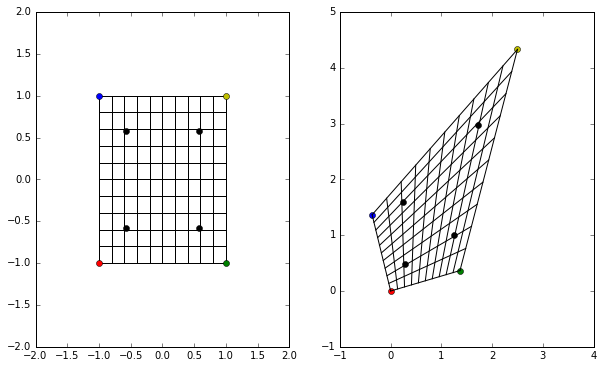

In [43]:
# Demonstrate transformation
figure(figsize=[10,6])
subplot(1,2,1)
# Grid
g(s,t)
# Corners
plot(-1,-1,'or')
plot(-1,1,'ob')
plot(1,-1,'og')
plot(1,1,'oy')
# Abscissas
plot(1/sqrt(3),1/sqrt(3),'ok')
plot(-1/sqrt(3),1/sqrt(3),'ok')
plot(1/sqrt(3),-1/sqrt(3),'ok')
plot(-1/sqrt(3),-1/sqrt(3),'ok')
# Axes limits
xlim(-2,2)
ylim(-2,2)

subplot(1,2,2)
ta=1
tb=1
tc=5
ttheta=pi/3
# Corners
plot(*nft(-1,-1,ta,tb,tc,ttheta),'or')
plot(*nft(-1,1,ta,tb,tc,ttheta),'ob')
plot(*nft(1,-1,ta,tb,tc,ttheta),'og')
plot(*nft(1,1,ta,tb,tc,ttheta),'oy')
# Grid
g(*nft(s,t,ta,tb,tc,ttheta))
# Abscissas
plot(*nft(1/sqrt(3),1/sqrt(3),ta,tb,tc,ttheta),'ok')
plot(*nft(-1/sqrt(3),1/sqrt(3),ta,tb,tc,ttheta),'ok')
plot(*nft(1/sqrt(3),-1/sqrt(3),ta,tb,tc,ttheta),'ok')
plot(*nft(-1/sqrt(3),-1/sqrt(3),ta,tb,tc,ttheta),'ok')
# Axes limits
xlim(-1,4);
ylim(-1,5);

x(s,t) = L*(-f_r*(f_s*(s - 1)*(t + 1) - (s + 1)*(2*f_s + t + 1))*cos(theta_f) + (f_s + 1)*(s - t)*sin(theta_f))/(4*f_r*(f_s + 1))
y(s,t) = -L*(f_r*(f_s*(s - 1)*(t + 1) - (s + 1)*(2*f_s + t + 1))*sin(theta_f) + (f_s + 1)*(s - t)*cos(theta_f))/(4*f_r*(f_s + 1))


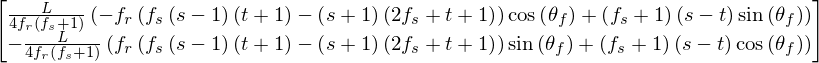

In [25]:
T = sp.simplify(sft(ss,tt,a,b,c,theta_f))
print("x(s,t) =",T[0])
print("y(s,t) =",T[1])
T

J = L**2*(-f_s**2*s - f_s**2*t + 2*f_s**2 + 4*f_s + s + t + 2)/(16*f_r*(f_s + 1)**2)


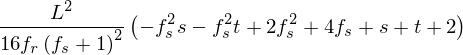

In [26]:
# Calculate Jacobian of rotated transform
A=sp.diff(sft(ss,tt,a,b,c,theta_f)[0],ss)
B=sp.diff(sft(ss,tt,a,b,c,theta_f)[0],tt)
C=sp.diff(sft(ss,tt,a,b,c,theta_f)[1],ss)
D=sp.diff(sft(ss,tt,a,b,c,theta_f)[1],tt)
J=(A*D-B*C).simplify()
print("J =",J)
J

In [44]:
# Full transform as a function of model parameters
def full_ft(s,t,L,theta_f,f_s,f_r):
    x = L*(-f_r*(f_s*(s - 1)*(t + 1) - (s + 1)*(2*f_s + t + 1))*cos(theta_f) 
            + (f_s + 1)*(s - t)*sin(theta_f))/(4*f_r*(f_s + 1)) 
    y = -L*(f_r*(f_s*(s - 1)*(t + 1) - (s + 1)*(2*f_s + t + 1))*sin(theta_f) 
            + (f_s + 1)*(s - t)*cos(theta_f))/(4*f_r*(f_s + 1))
    return x,y

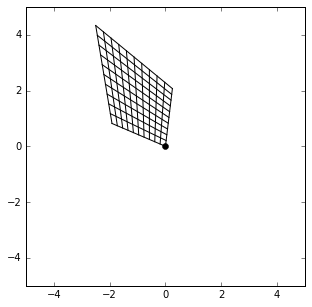

In [55]:
# Demonstration of full transform
figure(figsize=[5,5]);

# Parameters
_L = 5
_theta_f = 2*pi/3
_f_s = 0.5
_f_r = 2

# Plot
g(*full_ft(s,t,_L,_theta_f,_f_s,_f_r))
plot(0,0,'ok')
xlim(-5,5);
ylim(-5,5);

In [152]:
# Test integration using 2x2 Gaussian quadrature product rule over frond

# Parameters
_L = 5
_theta_f = 2*pi/3
_f_s = 0.5
_f_r = 2

# Function to integrate
def test_fun(s,t):
    return ones_like(s)

# Abscissae
absc = array([-1/sqrt(3),1/sqrt(3)])
weights = array([1,1])
total_int = 0;

for i in range(2):
    for j in range(2):
        _s = absc[i]
        _t = absc[j]
        
        J = abs(_L**2*(-_f_s**2*_s - _f_s**2*_t + 2*_f_s**2 + 4*_f_s + _s + _t + 2)/(16*_f_r*(_f_s + 1)**2))
        val = test_fun(*full_ft(_s,_t,_L,_theta_f,_f_s,_f_r))
        weight = weights[i]*weights[j]
        
        total_int += weight*val*J
        
# Calculate actual area of frond
frond_area = _L**2/(2*_f_r)

print("Integral = {}".format(total_int))
print("Area = {}".format(frond_area))

Integral = 6.25
Area = 6.25


In [77]:
type(ss) == sp.symbol.Symbol

True

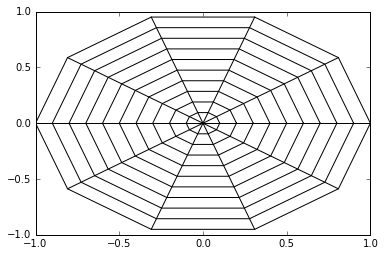

In [81]:
# Test method with another simple transform
# u,v [-1,1]x[-1,1]
def simple_transform(u,v):
    #u1,v1 [0,1]x[0,1]
    u1 = (u+1)/2
    v1 = (v+1)/2
    
    # Determine symbolic vs. numerical
    if type(u) == sp.symbol.Symbol:
        Fc = sp.cos
        Fs = sp.sin
        pp = sp.pi
    else:
        Fc = cos
        Fs = sin
        pp = pi
    
    # Polar coordinates - 2pi*u1=theta,v1=r
    x = v1*Fc(2*pp*u1)
    y = v1*Fs(2*pp*u1)
    
    return x,y

g(*simple_transform(s,t))

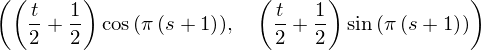

In [86]:
simple_transform(ss,tt)

In [130]:
def calculate_jacobian(trans_func):
    dxds = sp.diff(trans_func(ss,tt)[0],ss)
    dxdt = sp.diff(trans_func(ss,tt)[0],tt)
    dyds = sp.diff(trans_func(ss,tt)[1],ss)
    dydt = sp.diff(trans_func(ss,tt)[1],tt)
    
    return sp.simplify(abs(dxds*dydt - dxdt*dyds))

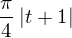

In [131]:
calculate_jacobian(simple_transform)

In [148]:
def calculate_unit_area(trans_func):
    absc = array([-1/sqrt(3),1/sqrt(3)])
    weights = array([1,1])
    total_int = 0;

    for i in range(2):
        for j in range(2):
            _s = absc[i]
            _t = absc[j]

            J = sp.lambdify((ss,tt),calculate_jacobian(trans_func))
            val = 1
            weight = weights[i]*weights[j]

            print("J({},{}) = {}".format(_s,_t,J(_s,_t)))
            total_int += J(_s,_t)
    
    return total_int

In [136]:
1/sqrt(3)

In [146]:
(1-1/sqrt(3))*(pi/4)

In [145]:
(1+1/sqrt(3))*(pi/4)

In [149]:
calculate_unit_area(simple_transform)

J(-0.5773502691896258,-0.5773502691896258) = 0.33194832233889376
J(-0.5773502691896258,0.5773502691896258) = 1.2388480044560026
J(0.5773502691896258,-0.5773502691896258) = 0.33194832233889376
J(0.5773502691896258,0.5773502691896258) = 1.2388480044560026


In [125]:
mm = lambda ll: sp.S(sp.lambdify(tt,calculate_jacobian(simple_transform))(ll))

In [126]:
mm(tto)